In [ ]:
# include libraries/packages
import os
#import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from tensorflow.keras import losses
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
# Check tensorflow version 
print(tf.version.VERSION)
print(tf.__version__)

2.4.1
2.4.1


In [ ]:
# Download Image dataset on disk and explore the dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

dataset = tf.keras.utils.get_file( "cats_and_dogs_filtered.zip", url, extract = True, cache_dir='.', cache_subdir='')
base_dir = os.path.join(os.path.dirname(dataset),'cats_and_dogs_filtered')

In [ ]:
# Print path for base directory
base_dir

'./cats_and_dogs_filtered'

In [ ]:
# base directory contains train and validation subdirectories for the training and validation datasets 

# train and validation subdirectories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# let's see first 10 filenames in the cats and dogs train directories (file naming conventions are the same in the validation directory)
# os.listdir() - Return a list containing the names of the entries in the directory given by path. The list is in arbitrary order, and does not include the special entries.

train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.117.jpg', 'cat.473.jpg', 'cat.58.jpg', 'cat.570.jpg', 'cat.108.jpg', 'cat.490.jpg', 'cat.274.jpg', 'cat.248.jpg', 'cat.555.jpg', 'cat.340.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
# Let's find out the total number of cat and dog images in the train and validation directories

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
#let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters
# With this inline backend, the output of plotting commands is displayed inline within frontends like the google colab, directly below the code cell that produced it.
%matplotlib inline

# Parameters for the graph; this will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

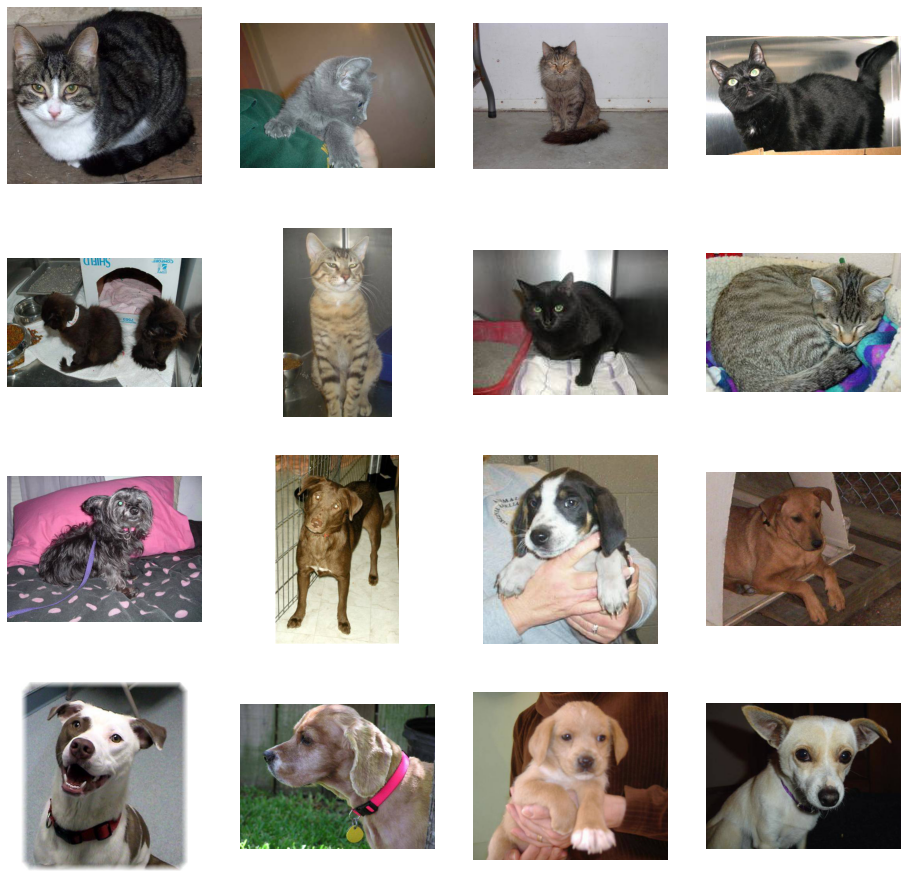

In [ ]:
# Display a batch of 8 cat and 8 dog pictures. 

# Get the current figure.If no current figure exists, a new one is created using figure().
fig = plt.gcf()
# Set size of figure to fit 4x4 configuration pics
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Building a Small Convnet from Scratch

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
# Relu overcome vanishing gradient prolem, learning faster and better. Relu is default for Convolutional Neural Network.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
# summarize the model architecture
# The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [ ]:
#  We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. 
# We will use the rmsprop optimizer with a learning rate of 0.001 (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
# Data Preprocessing
# Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network.
# We'll have one generator for the training images and one for the validation images. 
# Our generators will yield batches of 20 images of size 150x150 and their labels (binary).
# we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).


# All images will be rescaled by 1./255 (min-max normalization)
# In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Training

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 58s - loss: 0.7455 - acc: 0.5680 - val_loss: 0.6293 - val_acc: 0.6890
Epoch 2/15
100/100 - 58s - loss: 0.6367 - acc: 0.6585 - val_loss: 0.5917 - val_acc: 0.6890
Epoch 3/15
100/100 - 57s - loss: 0.5623 - acc: 0.7300 - val_loss: 0.5971 - val_acc: 0.6880
Epoch 4/15
100/100 - 57s - loss: 0.4827 - acc: 0.7670 - val_loss: 0.6404 - val_acc: 0.6680
Epoch 5/15
100/100 - 57s - loss: 0.3911 - acc: 0.8260 - val_loss: 0.6112 - val_acc: 0.7070
Epoch 6/15
100/100 - 58s - loss: 0.2946 - acc: 0.8635 - val_loss: 0.6779 - val_acc: 0.7140
Epoch 7/15
100/100 - 58s - loss: 0.2124 - acc: 0.9085 - val_loss: 0.8148 - val_acc: 0.7130
Epoch 8/15
100/100 - 57s - loss: 0.1456 - acc: 0.9445 - val_loss: 0.9360 - val_acc: 0.7020
Epoch 9/15
100/100 - 57s - loss: 0.1003 - acc: 0.9680 - val_loss: 1.1375 - val_acc: 0.7200
Epoch 10/15
100/100 - 57s - loss: 0.0860 - acc: 0.9730 - val_loss: 1.6984 - val_acc: 0.6760
Epoch 11/15
100/100 - 57s - loss: 0.0669 - acc: 0.9735 - val_loss: 1.7781 - val_acc: 0.66

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


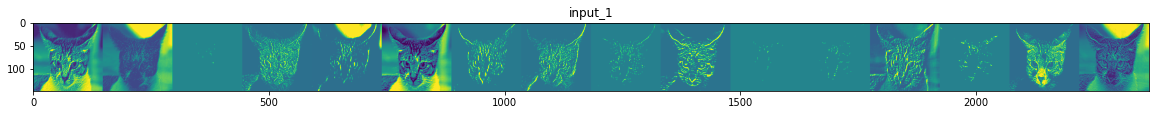

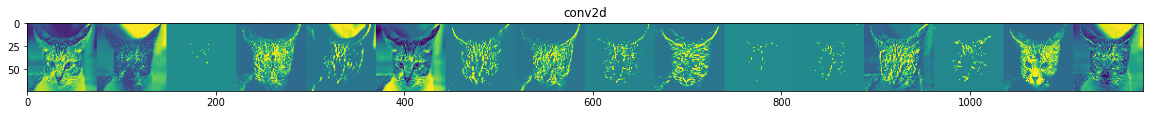

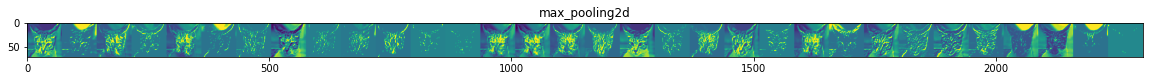

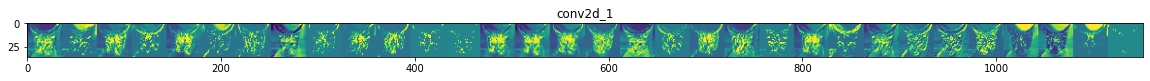

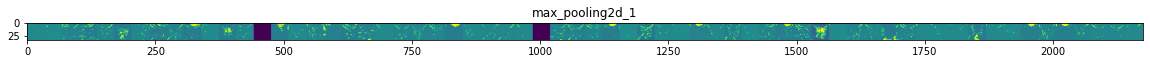

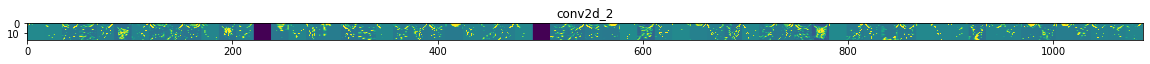

In [ ]:
# Visualizing Intermediate Representations
# we go from the raw pixels of the images to increasingly abstract and compact representations. 
# Let's define a new Model that will take an image as input, and will output intermediate representations for all layers in the previous model after the first.
# These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image.

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

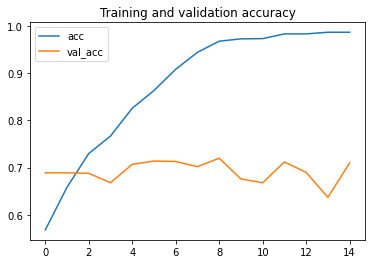

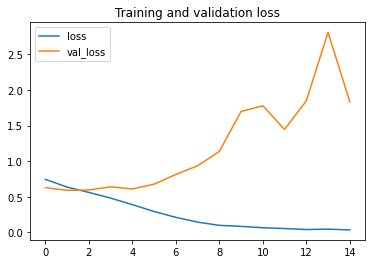

In [ ]:
# Evaluating Accuracy and Loss for the Model

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
a, = plt.plot(epochs, acc)
b, = plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend([a, b],["acc", "val_acc"])
plt.show()

# Plot training and validation loss per epoch
c,= plt.plot(epochs, loss)
d,= plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend([c, d],["loss", "val_loss"])

In [ ]:
print("Training Data Accuracy:",max(acc))
print("Training Data Loss:",max(loss))
print("Validation Data Accuracy",max(val_acc))
print("Validation Data Loss",max(val_loss))

Traning Data Accyracy: 0.9869999885559082
Traning Data Loss: 0.7454967498779297
Validation Data Accuracy 0.7200000286102295
Validation Data Accuracy 2.809699058532715


In [ ]:
# terminate the kernel and free memory resources

#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)